# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

import seaborn as sns
from scipy import stats as st

# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# Output File (CSV)
output_data_file = "output_data/cities_vm.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

577

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [5]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
print(query_url)

# Get weather data
weather_response = requests.get(query_url)
print(weather_response.status_code)
weather_json = weather_response.json()

http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=4f780db6fb0f5592f945054d40753a39&q=adrar&units=imperial
200


In [6]:
rows = []

for city in cities:
    print()
    print(city)
    row = {}
    
    try:
    
        # get the geocode, lat and long
        url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&appid={weather_api_key}"
        response = requests.get(url)

        if (response.status_code == 200):
            data = response.json()

            # parse data
            if (len(data) > 0):
                lat = data[0]["lat"]
                lon = data[0]["lon"]

                # make second request to get weather
                url2 = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial'
                response2 = requests.get(url2)

                if (response2.status_code == 200):
                    data2 = response2.json()

                    # parse data
                    weather = data2["weather"][0]["main"]
                    temp = data2["main"]["temp"]
                    humid = data2["main"]["humidity"]
                    pressure = data2["main"]["pressure"]
                    wind = data2["wind"]["speed"]
                else:
                    print(f"Weather request failed for {city}")
                    weather = None
                    temp = np.nan
                    humid = np.nan
                    pressure = np.nan
                    wind = np.nan

                # put into flat dictionary
                row["city"] = city
                row["latitude"] = lat
                row["longitude"] = lon
                row["weather"] = weather
                row["temperature"] = temp
                row["humidity"] = humid
                row["pressure"] = pressure
                row["wind_speed"] = wind

                # append to list
                rows.append(row)

            else:
                print(f"no lat/long for {city}")
                pass
        else:
            print(f"failed request for geocode for {city}")
            pass
    except Exception as e:
        print(e)
        print(f"Oh no! Everything failed and broke for {city}. There should be an error above.")
        print()
        
    # sleep
    time.sleep(2)


mount gambier

dikson

vaini

hermanus

fare

hasaki

puerto ayora

pevek

port alfred

egvekinot

albany

yakeshi

rikitea

guerrero negro

severo-kurilsk

kolokani

taolanaro
no lat/long for taolanaro

port hedland

puerto maldonado

makakilo city

port elizabeth

castro

hobart

bredasdorp

nanortalik

ancud

sarangani

kapaa

ushuaia

bom jardim

barcelos

souillac

mataura

general roca

zhongshu

nizhneyansk

behbahan

chernyshevskiy

hervey bay

qaanaaq

kutum

punta arenas

thompson

cape town

illoqqortoormiut

hilo

fairbanks

kon tum

comodoro rivadavia

lavrentiya

santa isabel do rio negro

lebu

belushya guba

sitka

krasnyy oktyabr

tasiilaq

kavaratti

torbay

new norfolk

hithadhoo

clyde river

omboue

chokurdakh

coquimbo

jiroft

marabba

tahta

aksarka

maghama

mahebourg

port hueneme

sakiai

maracaju

salisbury

atuona

sorland

saint-philippe

the valley

porto novo

gat

husavik

el guamo

mar del plata

busselton

krutinka

dujuma
no lat/long for dujuma

jie

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df = pd.DataFrame(rows)
df.head(10)

,city,latitude,longitude,weather,temperature,humidity,pressure,wind_speed
0,mount gambier,-37.824670,140.782007,Rain,73.63,58,1008,11.81
1,dikson,73.508389,80.512382,Clouds,-0.18,95,1010,4.56
2,vaini,-21.192567,-175.177280,Clouds,82.69,74,1014,10.36
3,hermanus,-34.417500,19.236111,Clouds,59.85,66,1018,11.81
4,fare,45.908020,13.516538,Clouds,56.39,96,1020,3.44
5,hasaki,35.752971,140.820132,Clouds,52.20,64,1025,12.64
6,puerto ayora,-0.747167,-90.313420,Clouds,68.20,88,1013,4.00
7,pevek,69.702817,170.274685,Clouds,-7.15,99,1007,1.41
8,port alfred,-33.598184,26.891477,Clouds,59.05,96,1020,1.01
9,egvekinot,66.322738,-179.120131,Clouds,20.88,94,1004,4.09


In [49]:
df.tail()

,city,latitude,longitude,weather,temperature,humidity,pressure,wind_speed
547,manono,-13.850823,-172.109469,Rain,89.02,79,1011,9.22
548,sisimiut,66.937191,-53.666482,Clouds,9.95,71,999,12.01
549,thinadhoo,0.532643,72.997142,Clouds,81.68,73,1011,13.85
550,encruzilhada do sul,-30.536175,-52.515604,Clouds,55.94,93,1017,7.36
551,itaituba,-4.262522,-55.987814,Clouds,76.96,83,1010,2.62


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         552 non-null    object 
 1   latitude     552 non-null    float64
 2   longitude    552 non-null    float64
 3   weather      552 non-null    object 
 4   temperature  552 non-null    float64
 5   humidity     552 non-null    int64  
 6   pressure     552 non-null    int64  
 7   wind_speed   552 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 34.6+ KB


In [17]:
df.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
df = pd.read_csv(output_data_file)
df.head()

,city,latitude,longitude,weather,temperature,humidity,pressure,wind_speed
0,mount gambier,-37.824670,140.782007,Rain,73.63,58,1008,11.81
1,dikson,73.508389,80.512382,Clouds,-0.18,95,1010,4.56
2,vaini,-21.192567,-175.177280,Clouds,82.69,74,1014,10.36
3,hermanus,-34.417500,19.236111,Clouds,59.85,66,1018,11.81
4,fare,45.908020,13.516538,Clouds,56.39,96,1020,3.44


In [19]:
#  Get the indices of cities that have humidity over 100%.
df[df["humidity"] > 100] 

,city,latitude,longitude,weather,temperature,humidity,pressure,wind_speed


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

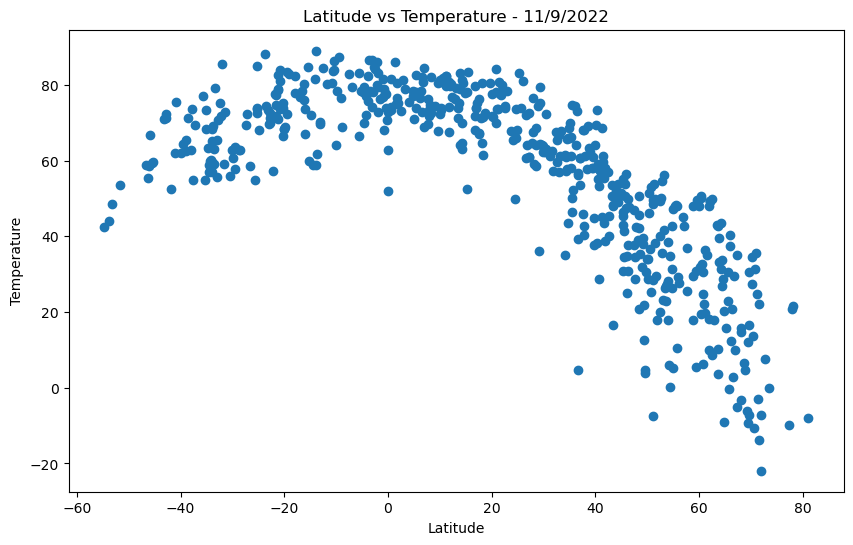

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(df.latitude, df.temperature)
plt.title("Latitude vs Temperature - 11/9/2022")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("scatterplt1.png")
plt.show()

## Latitude vs. Humidity Plot

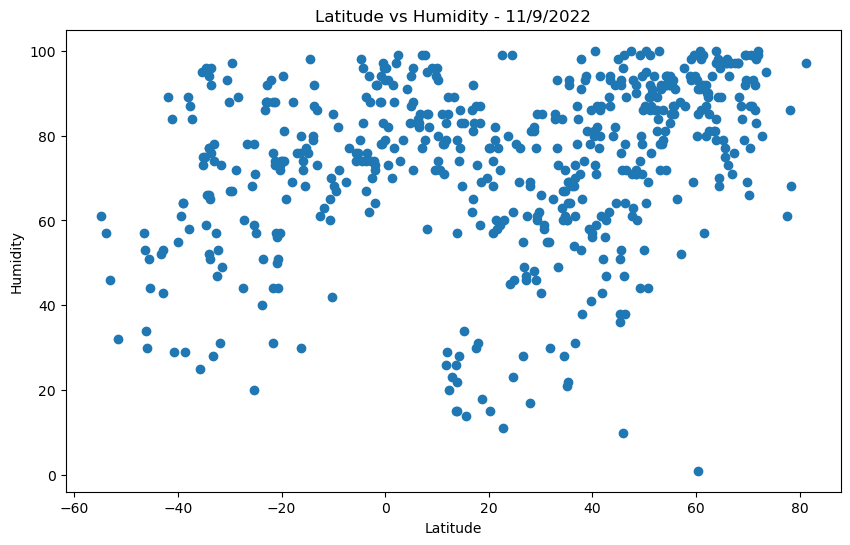

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(df.latitude, df.humidity)
plt.title("Latitude vs Humidity - 11/9/2022")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("scatterplt2.png")
plt.show()

## Latitude vs. Cloudiness Plot

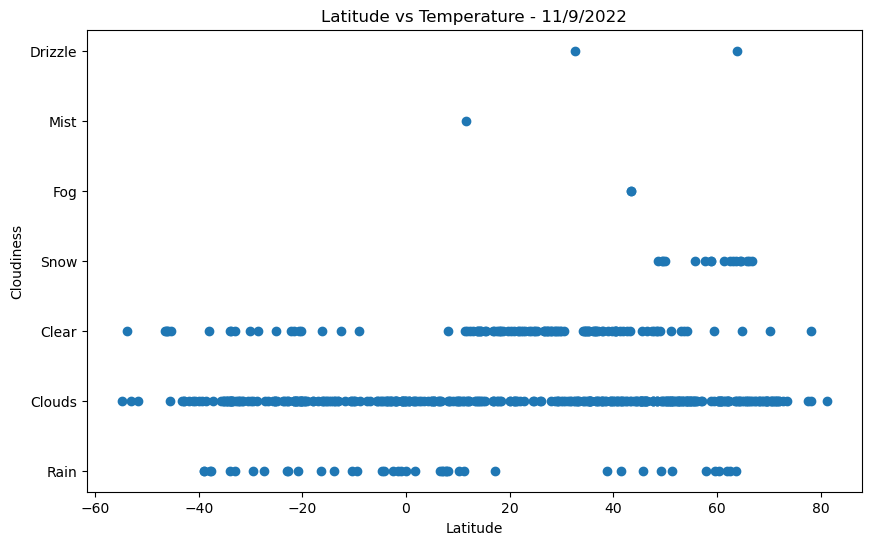

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(df.latitude, df.weather)
plt.title("Latitude vs Temperature - 11/9/2022")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("scatterplt3.png")
plt.show()

## Latitude vs. Wind Speed Plot

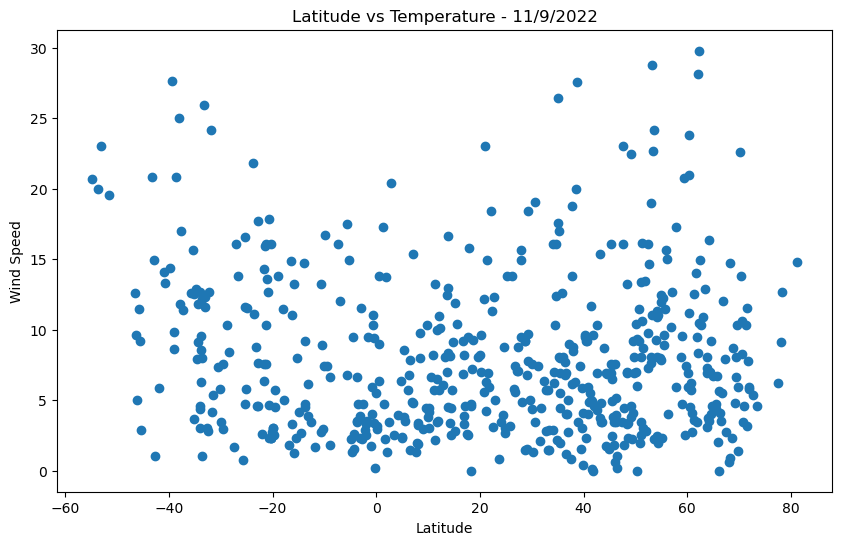

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(df.latitude, df.wind_speed)
plt.title("Latitude vs Temperature - 11/9/2022")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("scatterplt4.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7198480135934605


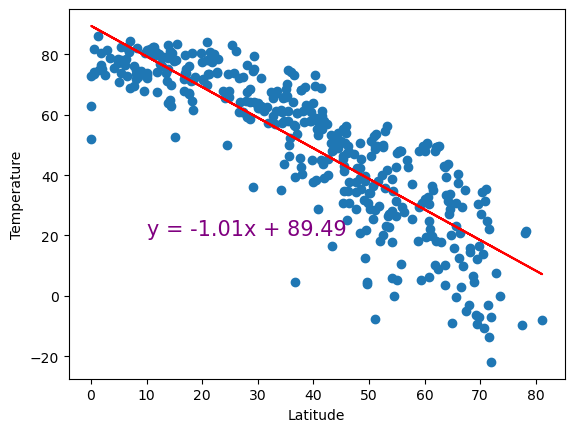

In [54]:
df2 = df.loc[df.latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.430675372462471


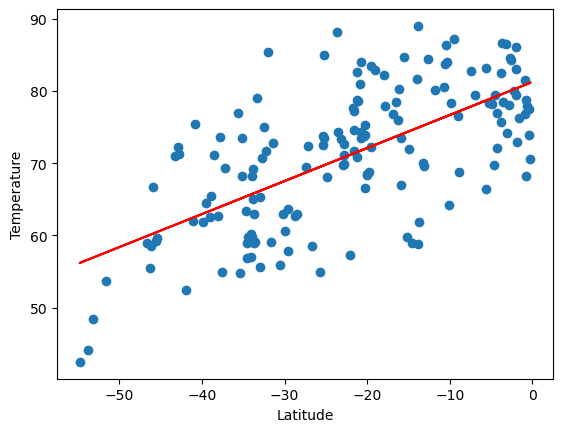

In [40]:
df2 = df.loc[df.latitude < 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-60,90),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07506923818597329


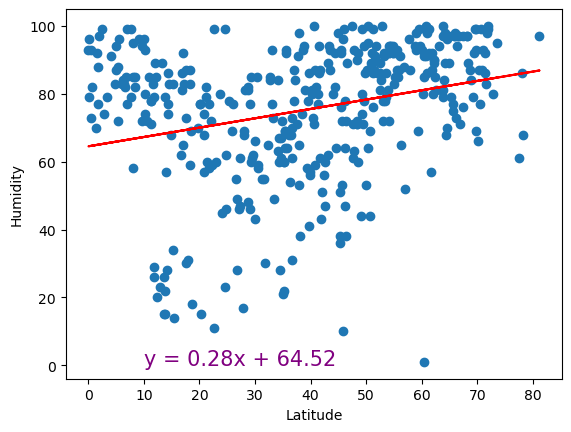

In [39]:
df2 = df.loc[df.latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16851003056517458


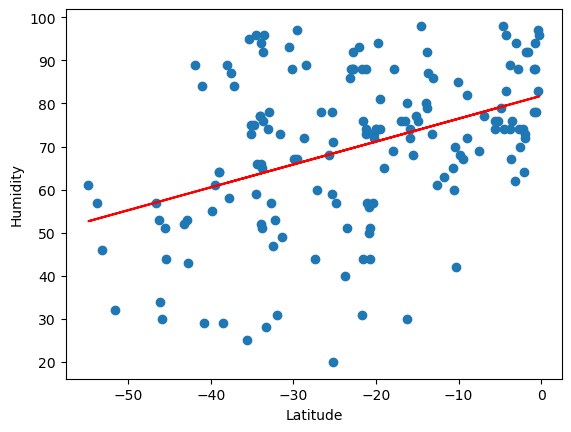

In [38]:
df2 = df.loc[df.latitude < 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.015885887449548233


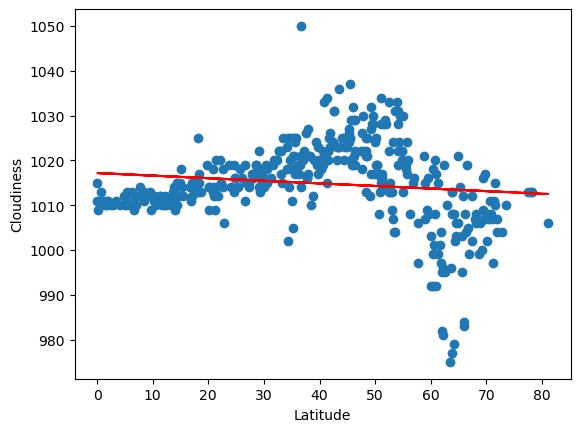

In [48]:
df2 = df.loc[df.latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['pressure']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06863944189463123


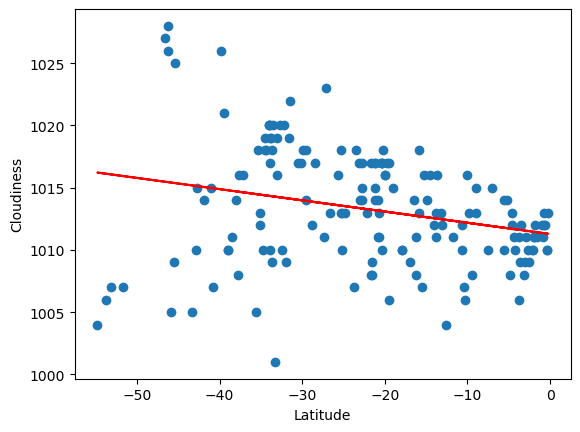

In [47]:
df2 = df.loc[df.latitude < 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['pressure']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.013425593702639524


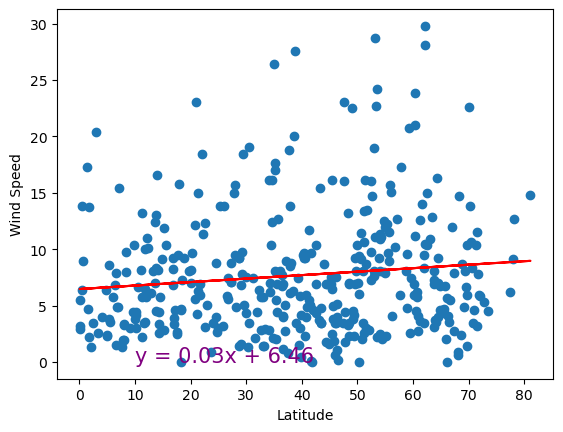

In [37]:
df2 = df.loc[df.latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.16843307232719115


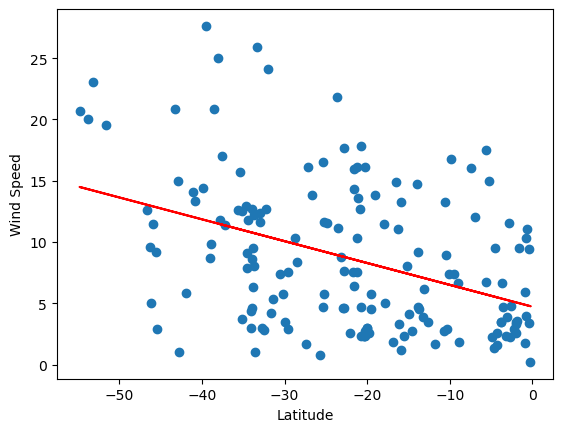

In [41]:
df2 = df.loc[df.latitude < 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="purple")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

Observations:
The southern and northern hemispheres of this dataset are both similarly humid. The heatmap shows that majority of the locations in the dataset are humid.
The southern hemisphere wind speed is lower closer to the equator.
As expected, the temperature is higher closer to the equator.